In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dat = np.loadtxt("dec_5x5x10_5mm_norm.txt", dtype=float)
#généré avec mo_makeplot(2,200,’c:\\temp\\myfile.txt’, 1)
#dans femm à 0.5 cm de l'aimant de section 0.5x0.5cm et profondeur 1cm
X = dat[:, 0]
Y = dat[:, 1]

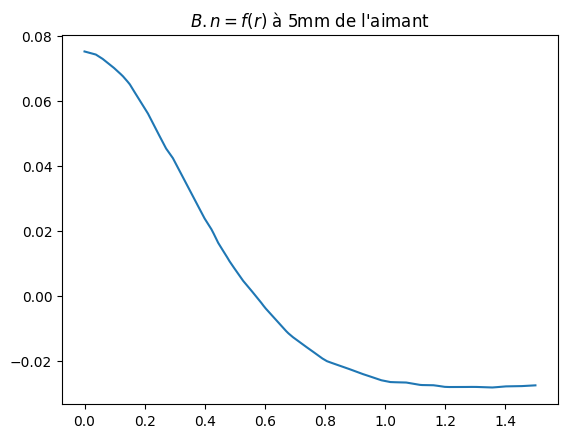

In [34]:
plt.figure()
plt.plot(X,Y)
plt.title("$B.n = f(r)$ à 5mm de l'aimant")
plt.show()

In [ ]:
#integrate thie radial field intensity over a surface S(r)
#X being the radius, Y being the normal intensity at that radius

def Phi(r): #r<0.14m = 14cm
    P = 0
    for i in range(len(X)-1):
        if X[i+1]-X[0]<=r:
            dr = X[i+1] - X[i]
            localr = X[i+1]
            P += (Y[i] + Y[i+1])/2 *(2*np.pi)*localr*dr
        else:
            break
    return P

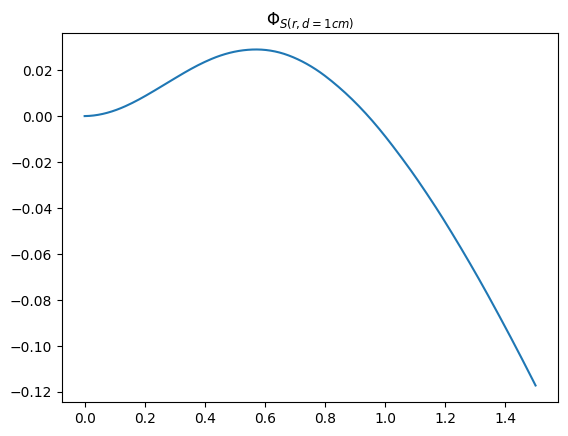

In [29]:
plt.figure()
plt.title("$\Phi _{S(r, d=1cm)}$")
plt.plot(X,[Phi(a) for a in X])
plt.show()

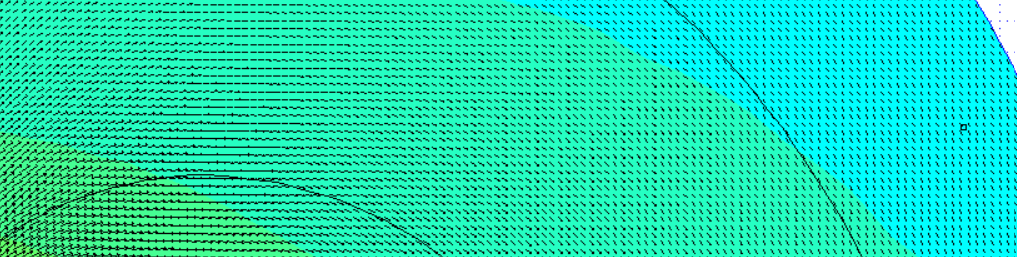


In [21]:
Phi(0.05)

0.00028107264993876865